In [1]:
import requests
import json
import csv
from datetime import timedelta, date, datetime

import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import t, norm, chi2
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8.0, 6.0
from ipywidgets import interact, fixed

In [2]:
#List of states and union territories with order according to the data we get from our source
st_ut = ['title',
 'andaman and nicobar islands',
 'andhra pradesh',
 'arunachal pradesh ',
 'assam',
 'bihar',
 'chhattisgarh',
 'chandigarh',
 'delhi',
 'daman and diu',
 'goa',
 'gujarat',
 'himachal pradesh',
 'haryana',
 'jharkhand',
 'jammu and kashmir',
 'karnataka',
 'kerala',
 'ladakh',
 'lakshadweep',
 'maharashtra',
 'meghalaya',
 'manipur',
 'madhya pradesh',
 'mizoram',
 'nagaland',
 'odisha',
 'punjab',
 'puducherry',
 'rajasthan',
 'sikkim',
 'telangana',
 'tamil nadu',
 'tripura',
 'india',
 #'un',#idk what is this
 'uttar pradesh',
 'uttarakhand',
 'west bengal']
for i in range(len(st_ut)):
   st_ut[i] = st_ut[i].capitalize()

In [3]:
url2 = 'https://api.covid19india.org/v4/min/timeseries.min.json'#our data source
rq2 = requests.get(url2)
data2 = rq2.json()
del data2['UN'] #There was no documentation as to what it means, so we exclude that data.

In [4]:
fromdate = "2021-01-01"
todate = '2021-06-20'

#fromdate = input('Enter from date:(format YYYY-MM-DD): ')
#todate = input('Enter to date:(format YYYY-MM-DD): ')
##Uncomment the above lines to enter your own dates
start_date = datetime.strptime(fromdate, '%Y-%m-%d')
end_date = datetime.strptime(todate, '%Y-%m-%d')

In [5]:
def daterange(start_date, end_date):      #function yields a single date in chronological order from the start_date to the end_date
    for n in range(int((end_date - start_date).days + 1)):
        yield start_date + timedelta(n)

In [6]:
def make_list(type_of_cases, delta_total = 'delta'):     #function for getting the required type_of_cases for each state in a specified range of dates(in the form of 2d lists)
  final_list = []
  for single_date in daterange(start_date, end_date):
    tmp_list = []
    for state in data2:
      try:
        tmp_list.append(data2[state]['dates'][str(single_date.date())][delta_total][type_of_cases])
      except:
        tmp_list.append(0)
    final_list.append(tmp_list)
  return final_list

In [7]:
confirmed_list = make_list('confirmed')
confirmed_cases = pd.DataFrame(confirmed_list, index = pd.date_range(start_date, end_date), columns = st_ut[1:])
#Turning the list into a dataframe

In [8]:
recovered_list = make_list('recovered')
recovered_cases = pd.DataFrame(recovered_list, index = pd.date_range(start_date, end_date), columns = st_ut[1:])
#Turning the list into a dataframe

In [9]:
total_active_list = np.array(make_list('confirmed', 'total')) - np.array(make_list('recovered', 'total')) - np.array(make_list('deceased', 'total'))
total_active_cases = pd.DataFrame(total_active_list, index = pd.date_range(start_date, end_date), columns = st_ut[1:])
#Turning the list into a dataframe

In [10]:
total_active_cases.describe() 

,Andaman and nicobar islands,Andhra pradesh,Arunachal pradesh,Assam,Bihar,Chhattisgarh,Chandigarh,Delhi,Daman and diu,Goa,...,Puducherry,Rajasthan,Sikkim,Telangana,Tamil nadu,Tripura,India,Uttar pradesh,Uttarakhand,West bengal
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,1.710000e+02,171.000000,171.000000,171.000000
mean,78.725146,54886.871345,890.561404,15968.426901,22111.017544,2281.730994,39465.695906,22267.730994,419.093567,6885.812865,...,4346.590643,43506.280702,1233.280702,20341.029240,75245.865497,1651.526316,1.130372e+06,61002.380117,18820.736842,36966.625731
std,82.363187,73403.871187,1317.419519,19885.158401,35051.291724,2613.249030,46629.421301,32241.950215,618.341161,9441.821489,...,5613.197735,66355.523708,1500.552554,23539.283172,97332.891345,2542.608363,1.205960e+06,94182.278883,25183.982437,46776.903918
min,0.000000,575.000000,0.000000,1603.000000,290.000000,123.000000,2721.000000,1019.000000,31.000000,464.000000,...,166.000000,1195.000000,126.000000,1640.000000,3952.000000,25.000000,1.375780e+05,1634.000000,1747.000000,3110.000000
25%,8.000000,1298.500000,4.000000,1679.500000,756.000000,240.500000,4323.500000,1791.000000,36.000000,767.000000,...,286.000000,2362.000000,151.000000,2057.000000,4615.000000,54.500000,1.862610e+05,3643.000000,2288.500000,4273.000000
50%,40.000000,4715.000000,57.000000,2966.000000,3982.000000,925.000000,11126.000000,4212.000000,95.000000,1379.000000,...,846.000000,7159.000000,257.000000,5053.000000,12157.000000,83.000000,4.878440e+05,10080.000000,4460.000000,8476.000000
75%,134.000000,101720.500000,1928.500000,35430.500000,26629.000000,3370.500000,73493.000000,28191.500000,524.000000,9500.000000,...,7399.000000,55220.500000,2740.000000,34563.000000,124236.500000,2699.500000,1.916198e+06,73972.000000,27952.000000,62638.000000
max,278.000000,211554.000000,3918.000000,56295.000000,115152.000000,8653.000000,131245.000000,99752.000000,2244.000000,32953.000000,...,18277.000000,212753.000000,4542.000000,80695.000000,313048.000000,8362.000000,3.750934e+06,310783.000000,85120.000000,132181.000000


In [11]:
confirmed_cases.describe()    #our required data... notice the discrepencies in our data- especially the min values

,Andaman and nicobar islands,Andhra pradesh,Arunachal pradesh,Assam,Bihar,Chhattisgarh,Chandigarh,Delhi,Daman and diu,Goa,...,Puducherry,Rajasthan,Sikkim,Telangana,Tamil nadu,Tripura,India,Uttar pradesh,Uttarakhand,West bengal
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,14.391813,5662.438596,95.684211,1557.274854,2730.421053,243.754386,4158.479532,4718.847953,41.830409,662.982456,...,448.625731,3759.426901,78.403509,1911.391813,9382.941520,168.918129,114901.011696,6546.152047,1448.678363,5436.514620
std,18.186412,7508.781657,139.183902,2128.067334,4405.517814,268.852526,5410.508699,7975.181946,71.080405,942.952263,...,580.808696,5857.142488,110.900569,2376.910180,11619.906233,263.643151,127129.539849,10914.377824,2241.523780,7040.081218
min,0.000000,30.000000,0.000000,3.000000,21.000000,0.000000,141.000000,94.000000,0.000000,29.000000,...,8.000000,60.000000,0.000000,0.000000,438.000000,0.000000,8579.000000,0.000000,-374.000000,119.000000
25%,1.000000,122.500000,0.000000,21.000000,88.000000,40.000000,377.500000,218.500000,0.000000,69.500000,...,28.000000,179.000000,2.000000,189.000000,553.500000,1.000000,15483.500000,194.500000,67.500000,257.000000
50%,4.000000,984.000000,3.000000,52.000000,351.000000,108.000000,1034.000000,444.000000,7.000000,140.000000,...,125.000000,475.000000,8.000000,493.000000,2089.000000,7.000000,56152.000000,682.000000,263.000000,896.000000
75%,26.500000,10127.000000,205.000000,3434.000000,3387.500000,397.500000,6464.000000,4257.500000,38.500000,915.000000,...,713.500000,4759.500000,149.500000,3119.500000,16739.000000,285.500000,190966.000000,6933.500000,2012.000000,9173.500000
max,97.000000,24171.000000,497.000000,6573.000000,15853.000000,895.000000,17397.000000,28395.000000,359.000000,4195.000000,...,2049.000000,18298.000000,420.000000,11451.000000,36184.000000,879.000000,414280.000000,37944.000000,9642.000000,20846.000000


In [12]:
recovered_cases.describe()      #our required data... notice the discrepencies in our data- especially the min values

,Andaman and nicobar islands,Andhra pradesh,Arunachal pradesh,Assam,Bihar,Chhattisgarh,Chandigarh,Delhi,Daman and diu,Goa,...,Puducherry,Rajasthan,Sikkim,Telangana,Tamil nadu,Tripura,India,Uttar pradesh,Uttarakhand,West bengal
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.00000,...,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.00000,171.000000,171.000000,171.000000
mean,13.748538,5282.222222,80.953216,1361.614035,2691.637427,241.087719,4113.023392,4654.766082,41.491228,636.19883,...,423.666667,3761.076023,63.842105,1830.590643,8915.421053,142.087719,110847.71345,6521.356725,1398.684211,5327.350877
std,17.021818,7437.372562,131.047715,1992.591240,4394.107237,269.987513,5274.554881,7416.823694,71.503630,940.69279,...,576.761058,6038.723099,101.234403,2498.330790,11359.292132,266.791301,124363.45843,10875.402669,2135.693896,7292.532034
min,0.000000,51.000000,0.000000,11.000000,-2837.000000,0.000000,120.000000,75.000000,0.000000,33.00000,...,9.000000,51.000000,0.000000,0.000000,453.000000,0.000000,9500.00000,0.000000,-265.000000,198.000000
25%,1.000000,131.500000,0.000000,23.000000,85.000000,34.000000,380.000000,258.500000,0.000000,62.50000,...,26.000000,182.000000,2.500000,195.000000,545.500000,1.000000,15988.00000,251.000000,78.500000,295.500000
50%,4.000000,377.000000,3.000000,70.000000,391.000000,84.000000,1152.000000,602.000000,5.000000,104.00000,...,47.000000,562.000000,9.000000,394.000000,1241.000000,7.000000,32269.00000,789.000000,272.000000,879.000000
75%,25.000000,10397.500000,139.000000,3062.000000,3148.000000,427.000000,6435.000000,5158.000000,46.500000,783.50000,...,688.000000,4112.000000,91.000000,3047.500000,19397.500000,126.500000,195040.00000,6854.000000,1837.500000,10588.000000
max,72.000000,24819.000000,513.000000,6266.000000,15800.000000,963.000000,18746.000000,27421.000000,339.000000,4008.00000,...,2017.000000,29459.000000,420.000000,17183.000000,33646.000000,1066.000000,422391.00000,40852.000000,8731.000000,19670.000000


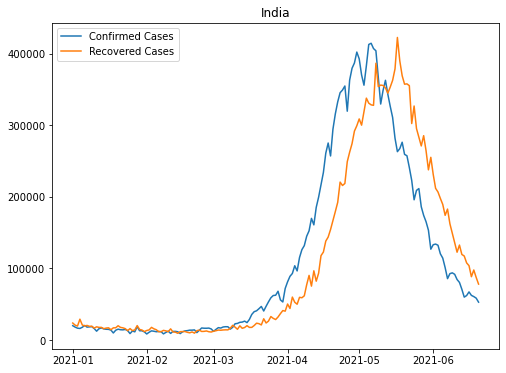

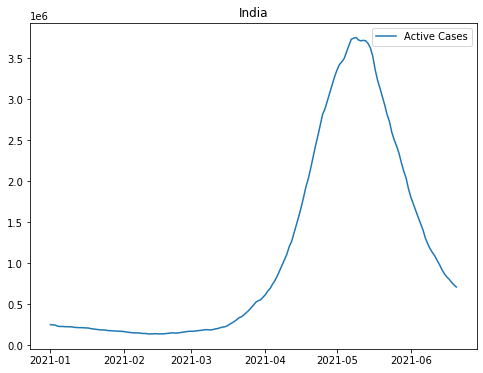

In [13]:
plt.figure(1)       #initial plotting
plt.plot(confirmed_cases['India'], label = 'Confirmed Cases');
plt.plot(recovered_cases['India'], label = 'Recovered Cases');
plt.legend()
plt.title('India')
plt.savefig('cases_India')
plt.figure(2)
plt.plot(total_active_cases['India'], label = 'Active Cases');    
plt.legend()
plt.title('India');
plt.savefig('active_cases_India')

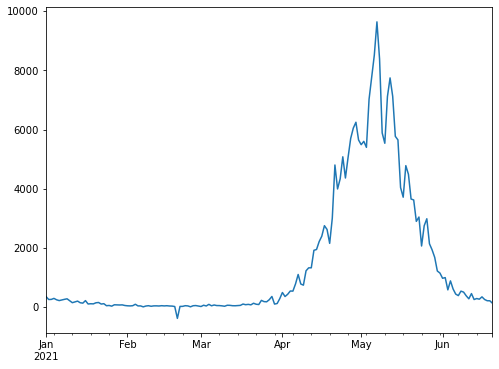

In [14]:
confirmed_cases['Uttarakhand'].plot();
plt.savefig('Uttarakhand')

We find that there is an error in the data since the number of new cases can never be negative and therefore we cannot except that value.


In [15]:
confirmed_cases[confirmed_cases['Uttarakhand']<0].index

DatetimeIndex(['2021-02-20'], dtype='datetime64[ns]', freq='D')

In [16]:
confirmed_cases['Uttarakhand'][pd.date_range('2021-02-10','2021-02-28')]

2021-02-10     35
2021-02-11     48
2021-02-12     49
2021-02-13     44
2021-02-14     54
2021-02-15     47
2021-02-16     53
2021-02-17     44
2021-02-18     41
2021-02-19     26
2021-02-20   -374
2021-02-21     30
2021-02-22     32
2021-02-23     54
2021-02-24     47
2021-02-25     17
2021-02-26     53
2021-02-27     59
2021-02-28     43
Freq: D, Name: Uttarakhand, dtype: int64

Clearly this seems to be a mistake. We will exclude all such values.

In [17]:
confirmed_cases[confirmed_cases<0] = np.nan   #excluding negative values
recovered_cases[recovered_cases<0] = np.nan
total_active_cases[total_active_cases<0] = np.nan

In [18]:
confirmed_cases.to_csv('/content/confirmed_cases.csv', index = True)      #saving our data in a csv file
recovered_cases.to_csv('/content/recovered_cases.csv', index = True)
total_active_cases.to_csv('/content/total_active_cases.csv', index = True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/confirmed_cases.csv'

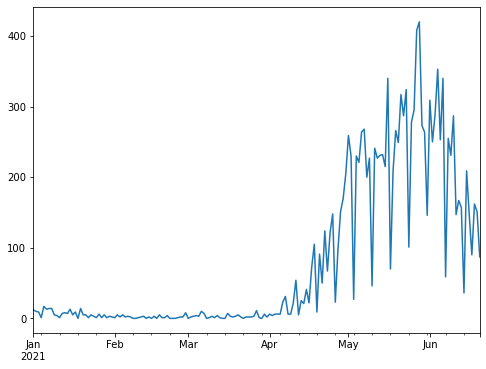

In [19]:
confirmed_cases['Sikkim'].plot();

States with lesser number of cases seem to have more jaggered/unstable curves. We will make a detailed study of the states with most number of cases.

In [20]:
confirmed_cases.mean().sort_values(ascending = False)[:6]

India            114901.011696
Maharashtra       23629.643275
Kerala            11979.304094
Karnataka         11034.836257
Tamil nadu         9382.941520
Uttar pradesh      6546.152047
dtype: float64

In [21]:
recovered_cases.mean().sort_values(ascending = False)[:6]

India            110847.713450
Maharashtra       22753.865497
Kerala            11687.005848
Karnataka         10231.690058
Tamil nadu         8915.421053
Uttar pradesh      6521.356725
dtype: float64

In [22]:
maharashtra_cases = pd.DataFrame([ confirmed_cases['Maharashtra'].rename('confirmed_cases') ,recovered_cases['Maharashtra'].rename('recovered_cases') ]).T
maharashtra_cases.describe()

,confirmed_cases,recovered_cases
count,171.000000,171.000000
mean,23629.643275,22753.865497
std,21985.216598,22235.294911
min,652.000000,1355.000000
25%,3711.000000,3748.500000
50%,14123.000000,13165.000000
75%,40168.500000,37603.500000
max,68631.000000,82266.000000


In [23]:
#similarly for other states
kerala_cases = pd.DataFrame([ confirmed_cases['Kerala'].rename('confirmed_cases') ,recovered_cases['Kerala'].rename('recovered_cases') ]).T
karnataka_cases = pd.DataFrame([ confirmed_cases['Karnataka'].rename('confirmed_cases') ,recovered_cases['Karnataka'].rename('recovered_cases') ]).T
tamil_nadu_cases = pd.DataFrame([ confirmed_cases['Tamil nadu'].rename('confirmed_cases') ,recovered_cases['Tamil nadu'].rename('recovered_cases') ]).T
uttar_pradesh_cases = pd.DataFrame([ confirmed_cases['Uttar pradesh'].rename('confirmed_cases') ,recovered_cases['Uttar pradesh'].rename('recovered_cases') ]).T

all_cases = pd.DataFrame([ confirmed_cases['India'].rename('confirmed_cases') ,recovered_cases['India'].rename('recovered_cases') ]).T

states = {'Maharashtra':maharashtra_cases, 'Kerala':kerala_cases, 'Karnataka':karnataka_cases, 'Tamil Nadu':tamil_nadu_cases, 'Uttar Pradesh': uttar_pradesh_cases, 'India': all_cases}

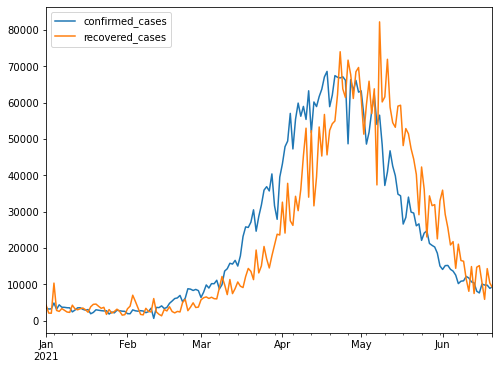

In [24]:
maharashtra_cases.plot();

In [25]:
def make_df(state_df, state_name):
  new_df = pd.DataFrame(state_df['confirmed_cases'].rename('no_of_cases'))
  new_df['type:'] = 'confirmed_cases'
  new_df2 = pd.DataFrame(state_df['recovered_cases'].rename('no_of_cases'))
  new_df2['type:'] = 'recovered_cases'
  df = pd.concat([new_df, new_df2])
  df['state'] = state_name
  return df
#reorganizing df by adding extra columns to use split jointplots and violinplots

In [26]:
main_df = pd.concat([make_df(maharashtra_cases, 'Maharashtra'), make_df(kerala_cases, 'Kerala'), 
                     make_df(karnataka_cases, 'Karnataka'), make_df(tamil_nadu_cases, 'Tamil Nadu'), 
                     make_df(uttar_pradesh_cases, 'Uttar Pradesh')] )

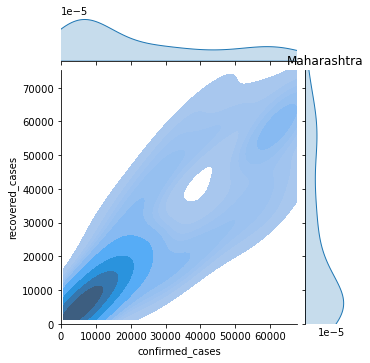

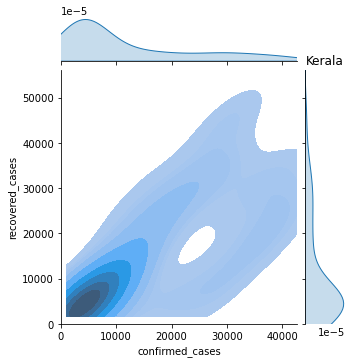

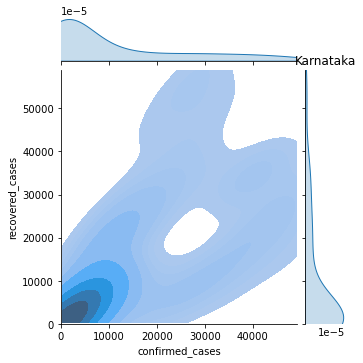

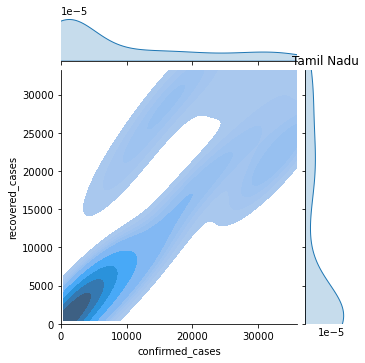

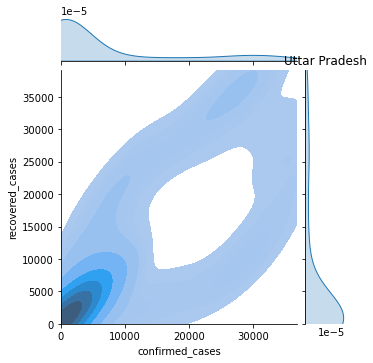

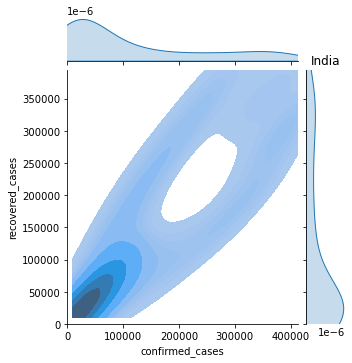

In [27]:
for state in states:
  sns.jointplot(data=states[state], x="confirmed_cases", y="recovered_cases", kind="kde", cut = 0, fill = True,
              xlim = (0, states[state]['confirmed_cases'].quantile(0.995)), ylim = (0, states[state]['recovered_cases'].quantile(0.995)), height = 5 );
  plt.title(state);

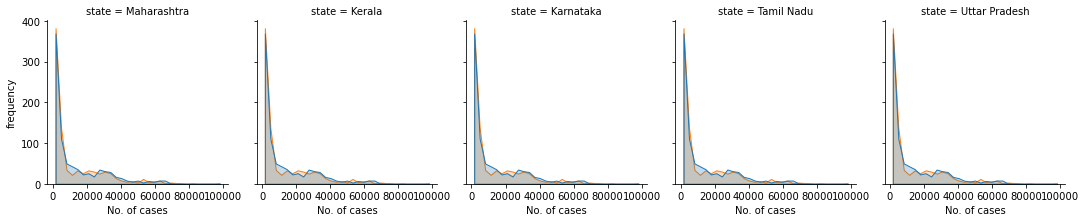

In [28]:
g = sns.FacetGrid(data=main_df, col = 'state');
g.map(sns.histplot, data=main_df, x = "no_of_cases", hue="type:", element = 'poly');
g.set_axis_labels('No. of cases', 'frequency');

In [29]:
main_df.head()

,no_of_cases,type:,state
2021-01-01,3524,confirmed_cases,Maharashtra
2021-01-02,3218,confirmed_cases,Maharashtra
2021-01-03,3282,confirmed_cases,Maharashtra
2021-01-04,4875,confirmed_cases,Maharashtra
2021-01-05,3160,confirmed_cases,Maharashtra


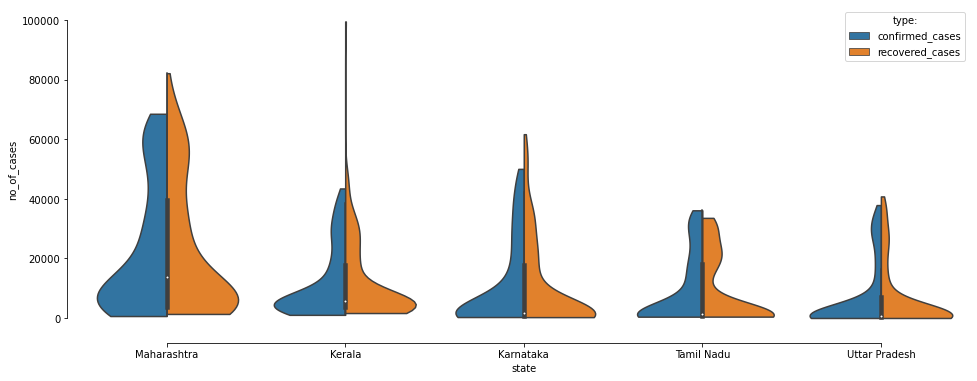

In [30]:
rcParams['figure.figsize'] = 16.0, 6.0
sns.violinplot(data = main_df,x = 'state', y = 'no_of_cases', hue = 'type:', split = True, cut = 0)
sns.despine(offset=10, trim=True);
rcParams['figure.figsize'] = 8.0, 6.0

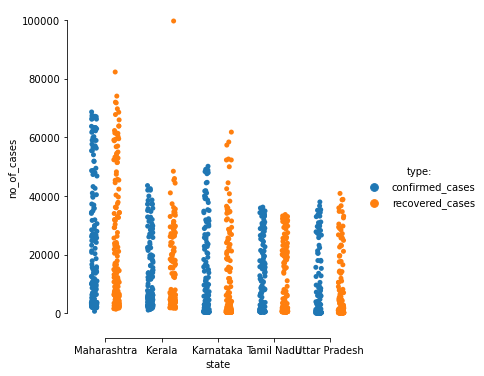

In [31]:
sns.catplot(data = main_df,x = 'state', y = 'no_of_cases', hue = 'type:', dodge = True)
sns.despine(offset=10, trim=True);

In [32]:
# sampling functions
def s1(n,state_data,fromdate,todate):     #returns a single sample of n random values from state_data in the given data range
    sample=state_data[fromdate:todate].sample(n=n,replace=True)
    return sample

In [33]:
def sampled_data(n_samples, n,state_data,fromdate,todate):       #returns sample parameters for n_samples samples
    mean_confirmed=np.zeros(n_samples)
    mean_recovered=np.zeros(n_samples)
    std_confirmed=np.zeros(n_samples)
    std_recovered=np.zeros(n_samples)
    for i in range(n_samples):
        df=s1(n,state_data,fromdate,todate)
        mean_confirmed[i]=df["confirmed_cases"].mean(skipna=True)
        std_confirmed[i]=np.std(df["confirmed_cases"])
        mean_recovered[i]=df["recovered_cases"].mean(skipna=True)
        std_recovered[i]=(np.std(df["recovered_cases"]))
    return pd.Series(mean_confirmed),pd.Series(std_confirmed),pd.Series(mean_recovered),pd.Series(std_recovered)   
        

In [34]:
a, b, c, d = sampled_data(1000, 20, maharashtra_cases, fromdate, todate)
a.describe()

count     1000.000000
mean     23341.315350
std       5020.744121
min       6631.800000
25%      19835.962500
50%      23200.900000
75%      26837.800000
max      40492.600000
dtype: float64

In [35]:
# 100*(1-alpha)% = 95% confidence interval
def conf_interval(data,n, alpha = 0.05):    
    a,b,c,d=data
    mean_confirmed=np.mean(a)
    std_confirmed=np.mean(b)
    mean_recovered=np.mean(c)
    std_recovered=np.mean(d)
    t_value=t(n-1).ppf(1-alpha/2)
    upper_limit_confirmed=uc=mean_confirmed+t_value*(std_confirmed/n**0.5)
    lower_limit_confirmed=lc=mean_confirmed-t_value*(std_confirmed/n**0.5)
    upper_limit_recovered=ur=mean_recovered+t_value*(std_recovered/n**0.5)
    lower_limit_recovered=lr=mean_recovered-t_value*(std_recovered/n**0.5)
    q_lc, q_uc = a.quantile([alpha/2, 1-alpha/2])
    q_lr, q_ur = c.quantile([alpha/2, 1-alpha/2])
    return np.array([[uc,lc] , [ur, lr]]), np.array([[q_uc,q_lc] , [q_ur, q_lr]])

In [36]:
def show_interval(state, n_samples = 1000,n= 20,alpha = 0.05, fromdate = fromdate, todate = todate):
  state_data = states[state]
  sampling_dist = sampled_data(n_samples,n,state_data,fromdate,todate)
  [uc_lc , ur_lr], [q_uc_lc, q_ur_lr] = conf_interval(sampling_dist, n, alpha)

  plt.figure(1)
  plt.hist(np.sqrt(n)*(sampling_dist[0] - sampling_dist[0].mean() )/sampling_dist[1].mean(), density = True);
  x = np.linspace(-3, 3)
  plt.plot(x, t(df = n-1).pdf(x), 'g--', label = 't_n-1');
  plt.vlines(np.sqrt(n)*(uc_lc- np.mean(sampling_dist[0]))/np.mean(sampling_dist[1]), [0,0], [0.3, 0.3], label = 'analytical confidence interval')
  plt.vlines(np.sqrt(n)*(q_uc_lc- np.mean(sampling_dist[0]))/np.mean(sampling_dist[1]), [0,0], [0.3, 0.3], label = 'quantile values', color = 'red')
  plt.title('Confirmed Cases')
  plt.legend()

  plt.figure(2)
  plt.hist(np.sqrt(n)*(sampling_dist[2]- np.mean(sampling_dist[2]))/np.mean(sampling_dist[3]), color = 'orange', density = True);
  plt.plot(x, t(df = n-1).pdf(x), 'g--', label = 't_n-1');
  plt.vlines(np.sqrt(n)*(ur_lr- np.mean(sampling_dist[2]))/np.mean(sampling_dist[3]), [0,0], [0.3, 0.3], label = 'analytical confidence interval')
  plt.vlines(np.sqrt(n)*(q_ur_lr- np.mean(sampling_dist[2]))/np.mean(sampling_dist[3]), [0,0], [0.3, 0.3], label = 'quantile values', color = 'red')
  plt.title('Recovered Cases')
  plt.legend()


In [38]:
interact(show_interval, n_samples = (100, 5000, 100), n = (5, 50, 5), state = ['Maharashtra', 'Kerala', 'Karnataka_cases', 'Tamil Nadu', 'Uttar Pradesh','India'], alpha = (0.01, 0.5, 0.01), fromdate = fixed(fromdate), todate = fixed(todate) );

interactive(children=(Dropdown(description='state', options=('Maharashtra', 'Kerala', 'Karnataka_cases', 'Tami…

Try playing with the values. Increasing the number of samples gives a better fit to the normal distribution and a smaller difference between intervals obtained using both the methods.

Increasing the alpha value results in a shorter interval.

##Hypothesis Testing

In real world we usually do not have complete population data. To analyze such a situation we will assume that we have only two samples of data. We will use one to make our null  and alternate hypothesis and then use the other sample to test how likely is it to get such a value given the hypothesis is true.

Since we know the true mean, we will plot that too, so that we get an estimate of how close does our sample means lie to the true mean.

We first code up a function to get various data like mean and standard deviation of different samples and the true population from their sampled and non-sampled dataframes.

In [39]:
def func(size_of_samples, state, fromdate, todate ):#letter r is for recovered, letter c for confirmed
  
  state_name = states[state]
  first_sample = s1(size_of_samples, state_name, fromdate, todate)
  test_sample = s1(size_of_samples, state_name, fromdate, todate)
  cfirst_sample, rfirst_sample = first_sample['confirmed_cases'], first_sample['recovered_cases']
  cstate_name, rstate_name = state_name['confirmed_cases'], state_name['recovered_cases']
  ctest_sample, rtest_sample = test_sample['confirmed_cases'], test_sample['recovered_cases']

  cx_bar = cfirst_sample.mean()
  cs = cfirst_sample.std()
  cmu = cstate_name.mean()
  csigma = cstate_name.std()
  ctest_x_bar = ctest_sample.mean()
  ctest_s = ctest_sample.std()
  rx_bar = rfirst_sample.mean()
  rs = rfirst_sample.std()
  rmu = rstate_name.mean()
  rsigma = rstate_name.std()
  rtest_x_bar = rtest_sample.mean()
  rtest_s = rtest_sample.std()

  return cx_bar, cs, cmu, csigma, ctest_x_bar, ctest_s , rx_bar, rs, rmu, rsigma, rtest_x_bar, rtest_s

Then we call this function from another function(func2-given below) to use the data to plot and it for visualisation.

### Null Hypothesis:

$\quad H_0 : \mu = \overline{X_0}  $

$\quad$ i.e. The mean of the first sample is the true mean of the sampling distribution.

### Alternate Hypothesis
$\quad H_1 : \mu \neq \overline{X_0}  $

$\quad$ i.e. The mean of the first sample is not the true mean of the sampling distribution.

Our  initial approach was to plot a t-distribution centred at the mean of the first sample and scale it by the standard deviation of the first sample, then we plot vlines indicating our level of significance(alpha - $\alpha$), then the p-values.

$ Z = \sqrt{n} \cdot \frac{\overline{X} - \mu}{S} \sim t_{n-1}$

In [40]:
def func2(n,state,alpha, fromdate,todate ):#c = confirmed, r = recovered
  
  y = np.linspace(-3, 3)  
  cmiu_0, cs_0 , cmu , csigma, ctest_mean , ctest_std, rmiu_0, rs_0 , rmu , rsigma, rtest_mean , rtest_std = func(n, state, fromdate, todate)
  t_value=np.array([t(n-1).ppf(1-alpha/2), t(n-1).ppf(alpha/2)])
  plt.figure(figsize=(20,10))

  #confirmed
  plt.subplot(1,2,1)
  plt.plot(y, t(n-1).pdf(y), 'g--', label = 't_n-1');
  plt.vlines(np.sqrt(n)*(cmu- cmiu_0)/(cs_0), 0, 0.3, label = 'true mean of entire distribution', colors='b')
  z_val_c = np.sqrt(n)*(ctest_mean- cmiu_0)/(cs_0)
  p_val_c = 1 - np.abs(t(n-1).cdf(z_val_c) - t(n-1).cdf(-z_val_c))
  plt.vlines(z_val_c, 0, 0.3, label = 'test mean with p-value: %.3f' % p_val_c, colors = 'r')
  plt.vlines(t_value, [0,0], [0.3, 0.3], label = 'confidence interval')
  plt.title('confirmed cases')
  plt.legend()
  
  #recovered
  plt.subplot(1,2,2)
  plt.plot(y, t(n-1).pdf(y), 'g--', label = 't_n-1');
  plt.vlines(np.sqrt(n)*(rmu- rmiu_0)/(rs_0), 0, 0.3, label = 'true mean of entire distribution', colors='b')
  z_val_r = np.sqrt(n)*(rtest_mean- rmiu_0)/(rs_0)
  p_val_r = 1 - np.abs(t(n-1).cdf(z_val_r) - t(n-1).cdf(-z_val_r))
  plt.vlines(z_val_r, 0, 0.3, label = 'test mean with p-value: %.3f' % p_val_r, colors = 'r')
  plt.vlines(t_value, [0,0], [0.3, 0.3], label = 'confidence interval')
  plt.title('recovered cases')
  plt.legend()

Since displacing and scaling of the t-distribution is a relatively tougher task, we diplace and scale everything else to the t-distribution. Hence the plot(t-distribution and vlines) being closer to the origin than any of the means.

We do the above given procedure for both recovered and confirmed cases, then we use the interact function to(you guessed it) interact with the code.The true mean is added to see how close either of the sample means are to the true statistic.

In [41]:
interact(func2, n = (15, 50, 1), state = ['Maharashtra', 'Kerala', 'Karnataka_cases', 'Tamil Nadu', 'Uttar Pradesh','India'], alpha = (0.01, 0.5, 0.01), fromdate = fixed(fromdate), todate = fixed(todate) );

interactive(children=(IntSlider(value=32, description='n', max=50, min=15), Dropdown(description='state', opti…

Using the above given code we get to understand how accurate our initial guess from a sample is.We take the data from the first sample and treat it to be true, then using a test sample we check if it is within our confidence interval.

What does a mean(statistic) mean(meaning) for our Covid-19 system?
It gives us solid numbers(the mean and then by playing with interact how often our estimated mean is accurate).
From this information one can make further useful or essential inferences like when, where, whether and how much of a resource is to be employed for some task, or drive other policies or decisions required to be made to curb the virus without knowing all the information. (which is of utmost importance so that we can come to campus)

this is for point 9 Regression

In [42]:
#getting data for our regression model
#7 day moving average to get a smoother curve
moving_avg_confirmed_cases = confirmed_cases.rolling(window = 7).mean() #alternate way: pd.DataFrame(make_list('confirmed', 'delta7'), index = pd.date_range(start_date, end_date), columns = st_ut[1:])/7
moving_avg_active_cases = total_active_cases.rolling(window = 7).mean()

In [43]:
state_list = list(dict(moving_avg_confirmed_cases.mean().sort_values(ascending = False)[:16]).keys())

In [44]:
log_dict = {}
for state in state_list:
  log_dict[state] = pd.concat( [np.log(moving_avg_confirmed_cases[state].rename('log_new_cases')[7:]), np.log(moving_avg_active_cases[state].rename('log_active_cases')[7:]) ], axis = 1)

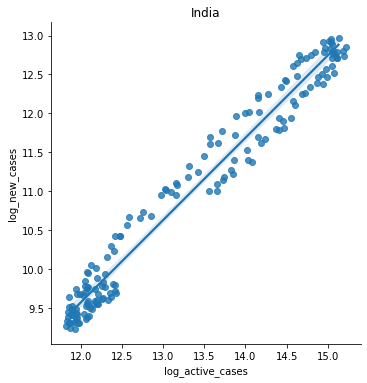

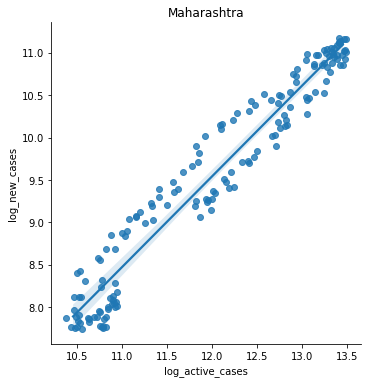

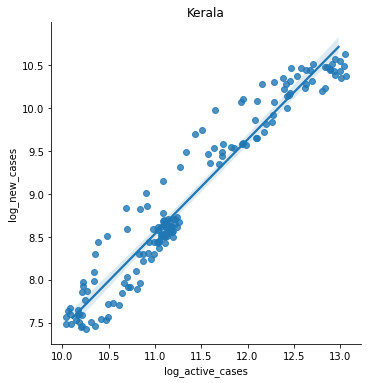

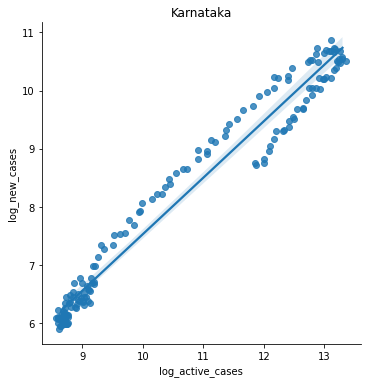

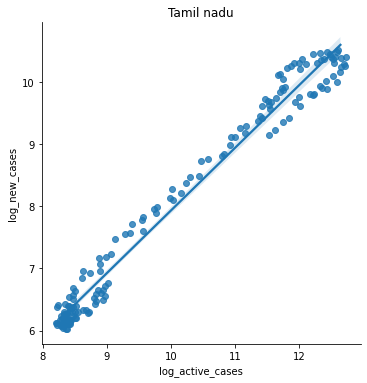

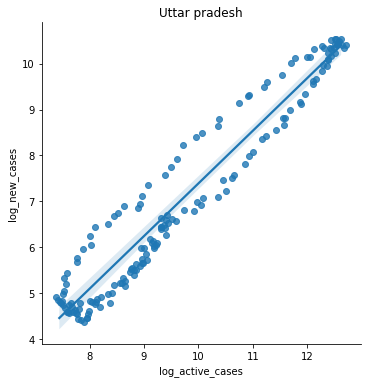

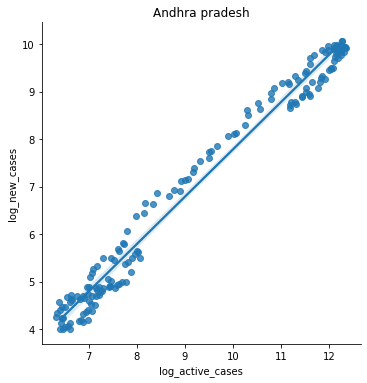

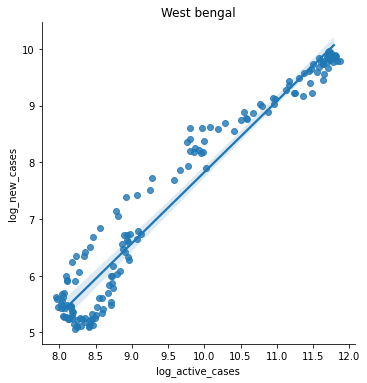

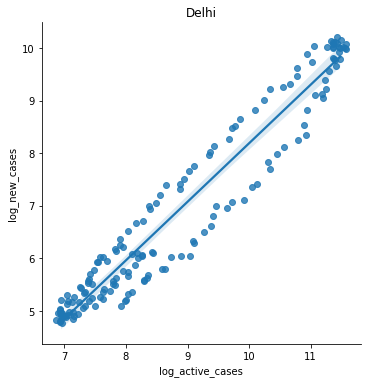

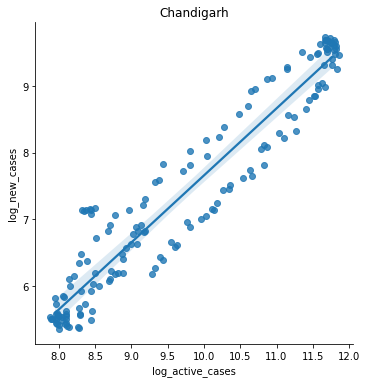

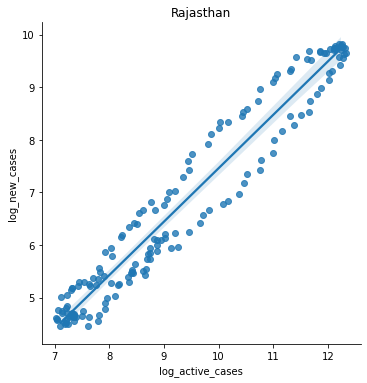

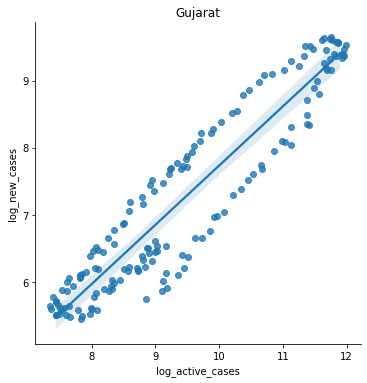

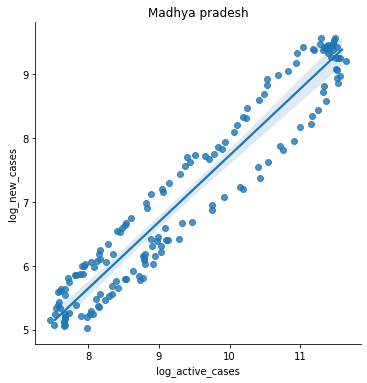

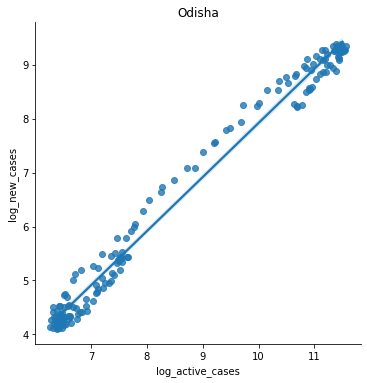

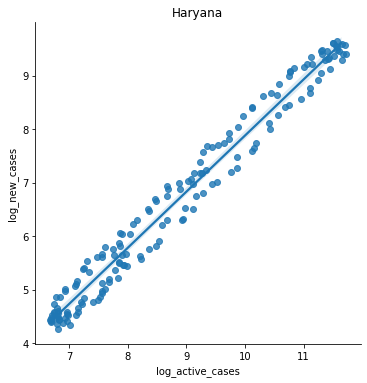

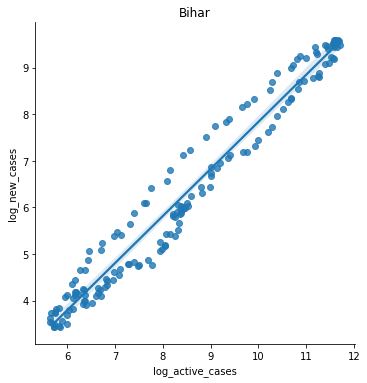

In [45]:
for state in log_dict:
  sns.lmplot(x = 'log_active_cases', y = 'log_new_cases', data = log_dict[state], ci = 100, x_jitter=0.1, y_jitter=0.1, palette="Set2"); #jitter is only for aesthetic purposes
  plt.title(state)

Using statsmodels.api function we find the data correspoding to our regression model. We will then compare this with our calculated values.

In [46]:
x = log_dict['Maharashtra']['log_new_cases']
X = sm.add_constant(x)
y = log_dict['Maharashtra']['log_active_cases']
model = sm.OLS(y, X, missing='drop')
results = model.fit()
print(results.summary() )

                            OLS Regression Results                            
Dep. Variable:       log_active_cases   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     2808.
Date:                Wed, 30 Jun 2021   Prob (F-statistic):          3.04e-104
Time:                        15:52:02   Log-Likelihood:                -1.9158
No. Observations:                 164   AIC:                             7.832
Df Residuals:                     162   BIC:                             14.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.5907      0.160     22.445

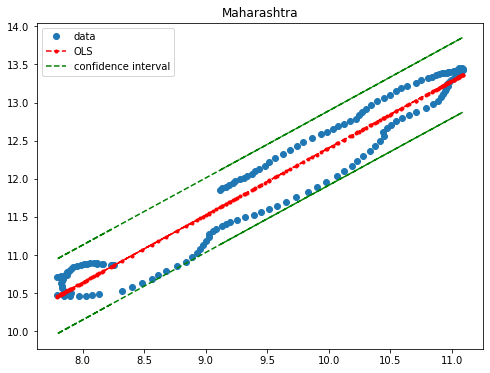

In [47]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
#ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'g--', label = 'confidence interval')
ax.plot(x, iv_l, 'g--')
ax.legend(loc='best');
plt.title('Maharashtra')
plt.savefig('reg_plot')

In [48]:
np.polyfit(  log_dict['Maharashtra']['log_new_cases'],log_dict['Maharashtra']['log_active_cases'], deg = 1)

array([0.88134038, 3.59073626])

In [49]:
def fit(x, y):            #returns coefficients of affine regression
    return np.polyfit(x, y, 1)

def predict(coef, x):     #using the coefficients, returns the predicted values of y i.e. yp
    return coef[0]*x + coef[1]

def get_rsq(y, yp):       #returns the r^2 values
    sse = np.sum((yp - y)**2)
    ybar = np.mean(y)
    sst = np.sum((y - ybar)**2)
    #ssr = np.sum((yp - ybar)**2) #for curves that do not minimise the squared sum of errors
    ssr = sst - sse
    return ssr/sst

def fit_predict(x, y):
    coef = fit(x, y)
    yp = predict(coef, x)
    r2 = get_rsq(y, yp)
    return yp, r2, coef

In [50]:
yp, r2, coef = fit_predict(log_dict['Maharashtra']['log_new_cases'],log_dict['Maharashtra']['log_active_cases'])

In [51]:
np.max(np.abs(results.predict() - yp)) < 1e-12

True

In [52]:
np.abs(results.rsquared - r2) < 1e-12

True

In [53]:
np.abs(coef[::-1] - results.params) < 1e-12

const            True
log_new_cases    True
dtype: bool

Since both the methods give the same value upto atleast 12 digits of accuracy, we have confirmed our calculations. For further calculations, we will use the methods provided by the imported module.

In [54]:
for state in log_dict:
  coefs = np.polyfit(  log_dict[state]['log_new_cases'],log_dict[state]['log_active_cases'], deg = 1)
  print(state, np.exp(coefs[1]) )

India 25.968406297950587
Maharashtra 36.260763422052065
Kerala 39.76778905406636
Karnataka 12.476038416684512
Tamil nadu 9.638981737074399
Uttar pradesh 52.11689664954344
Andhra pradesh 10.050094131490143
West bengal 58.27491506957043
Delhi 21.082152360086376
Chandigarh 19.65840043302618
Rajasthan 20.16995296889297
Gujarat 9.505118770690471
Madhya pradesh 21.600998293420457
Odisha 8.879281863098397
Haryana 14.176811338095938
Bihar 11.863184601237336


<AxesSubplot:xlabel='index'>

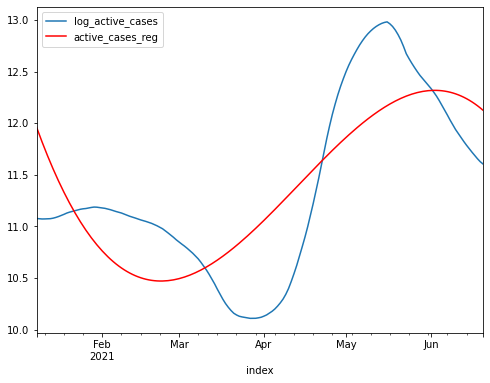

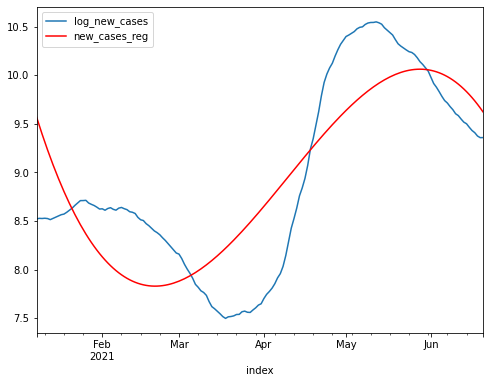

In [55]:
df = log_dict['Kerala'].reset_index()#[30:120]
#df['confirmed_cases'] = np.log(df['confirmed_cases'])
#del df['index']
coef1 = np.polyfit(x = df.index, y = df['log_active_cases'], deg =3 )
df.insert(3, 'active_cases_reg', np.poly1d(coef1)(df.index) )
g = df.plot(x = 'index', y = 'log_active_cases' )
df.plot(x = 'index', y = 'active_cases_reg' ,color='Red',ax=g)
#plt.plot(df.index, np.poly1d(coef)(df.index) )
#np.log(maharashtra_cases).plot()
coef2 = np.polyfit(x = df.index, y = df['log_new_cases'], deg = 3)
df.insert(3, 'new_cases_reg', np.poly1d(coef2)(df.index) )
g = df.plot(x = 'index', y = 'log_new_cases' )
df.plot(x = 'index', y = 'new_cases_reg' ,color='Red',ax=g)

In [56]:
df['index'] = sm.add_constant(df['index'])
model = sm.OLS( df['log_active_cases'],df.index, missing='drop')
results = model.fit()
print(results.summary() )

                                 OLS Regression Results                                
Dep. Variable:       log_active_cases   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                              585.5
Date:                Wed, 30 Jun 2021   Prob (F-statistic):                    7.81e-56
Time:                        15:52:44   Log-Likelihood:                         -506.80
No. Observations:                 164   AIC:                                      1016.
Df Residuals:                     163   BIC:                                      1019.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [57]:
results.params

x1    0.10696
dtype: float64

<AxesSubplot:xlabel='log_new_cases'>

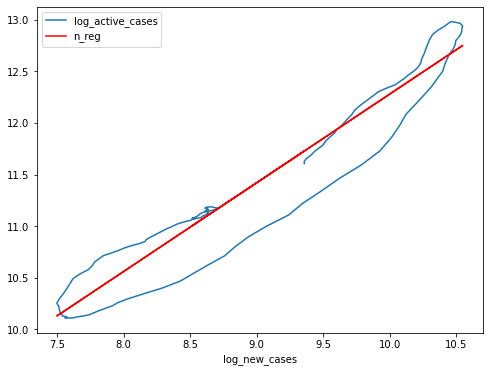

In [58]:
coef1 = np.polyfit(x = df['log_new_cases'], y = df['log_active_cases'], deg = 1)
df.insert(3, 'n_reg', np.poly1d(coef1)(df['log_new_cases']) )
g = df.plot(x = 'log_new_cases', y = 'log_active_cases' )
df.plot(x = 'log_new_cases', y = 'n_reg' ,color='Red',ax=g)

In [59]:
del df['n_reg']

In [60]:
coef1

array([0.85967305, 3.68305726])